# phageParser - Distribution of Number of Spacers per Locus

C.K. Yildirim (cemyildirim@fastmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) demo is available at [http://github.com/phageParser/phageParser](https://github.com/phageParser/phageParser/tree/django-dev/demos)

To run this notebook locally:
* `git clone` or [download](https://github.com/phageParser/phageParser/archive/master.zip) this repository
* Install [Jupyter Notebook](http://jupyter.org/install.html)
* In a command prompt, type `jupyter notebook` - the notebook server will launch in your browser
* Navigate to the phageParser/demos folder and open the notebook

## Introduction

This demo uses the REST API of phageParser to plot the distribution of number of spacers for CRISPR loci.
In this case, the API is consumed using the `requests` library and the json responses are parsed for gathering
number of spacers for each locus.

In [1]:
# import packages
import requests
import json
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set_palette("husl")

In [4]:
#Url of the phageParser API
apiurl = 'https://phageparser.herokuapp.com'
#Get the initial page for listing of accessible objects and get url for spacers
r=requests.get(apiurl)
organisms_url = r.json()['organisms']

In [7]:
#Iterate through each page and merge the json response into a dictionary for organisms
organism_dict = {}
r=requests.get(organisms_url)
last_page = r.json()['meta']['total_pages']
for page in range(1,last_page+1):
    url = organisms_url+'?page={}&include[]=loci.spacers'.format(page)
    payload = requests.get(url).json()
    organism_objs = payload['organisms']
    for organism_obj in organism_objs:
        organism_dict[organism_obj['id']] = organism_obj

In [8]:
#Calculate the number of spacers for each locus
locus_num_spacer = np.array([ len(loc['spacers']) for v in organism_dict.values() for loc in v['loci']])
#Calculate the mean and standard deviation for spacer basepair lengths
mu, sigma = locus_num_spacer.mean(), locus_num_spacer.std()
print("Calculated mean basepair length for spacers is {:.2f}+/-{:.2f}".format(mu,sigma))

Calculated mean basepair length for spacers is 18.17+/-27.07


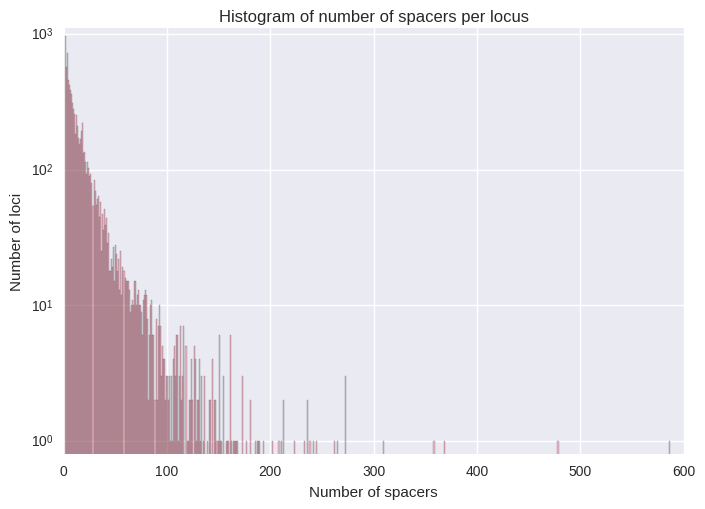

In [19]:
g=sns.distplot(locus_num_spacer,bins=range(0,600,1),kde=False)
g.set(yscale="log")
g.set_ylim(8*10**-1,1.1*10**3)
g.set_title("Histogram of number of spacers per locus")
g.set_xlabel("Number of spacers")
g.set_ylabel("Number of loci")
plt.show()

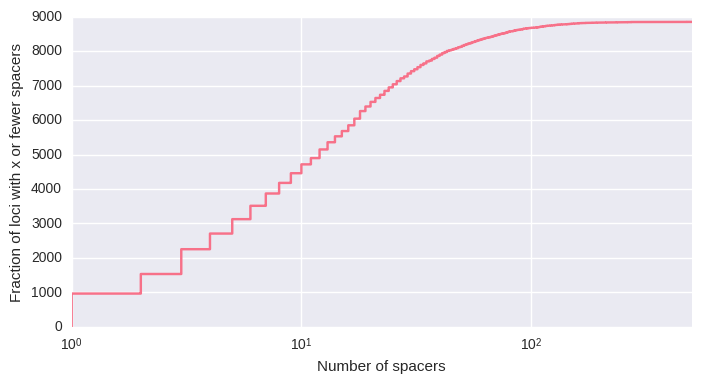

In [17]:
#Plot cumulative probability of data
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
sorted_data = np.sort(locus_num_spacer)
ax.step(sorted_data, np.arange(sorted_data.size), label='Empirical')

#Format the figure and label
ax.grid(True)
#ax.set_title('Cumulative distribution of locus sizes')
ax.set_xlabel("Number of spacers")
ax.set_ylabel("Fraction of loci with x or fewer spacers")
ax.set_xlim(1,500)
ax.set_xscale('log')
plt.show()